In [1]:
import numpy as np

import pandas as pd
from pandas.plotting import table

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
pd.set_option('display.max_columns', 0)
pd.set_option('display.max_rows', 0)

In [9]:
data_path = r'C:\Users\DucTRung\Desktop\GitHub\Covid_19_and_Press_Freedom_Index_Analysis\wrangled_frame'

In [7]:
charts_path = r'C:\Users\DucTRung\Desktop\GitHub\Covid_19_and_Press_Freedom_Index_Analysis\charts'

In [16]:
df = pd.read_csv(data_path + "\\wrangled_f_6.csv")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   169 non-null    object 
 1   total_cases               169 non-null    int64  
 2   total_deaths              169 non-null    float64
 3   total_recovered           164 non-null    float64
 4   total_tests               150 non-null    float64
 5   cases/1m                  169 non-null    float64
 6   deaths/1m                 169 non-null    float64
 7   tests/1m                  150 non-null    float64
 8   press_freedom_index_2020  169 non-null    float64
 9   region                    169 non-null    object 
 10  continent                 169 non-null    object 
 11  pfi_category              169 non-null    object 
dtypes: float64(7), int64(1), object(4)
memory usage: 16.0+ KB


In [17]:
df = df[['cases/1m', 'deaths/1m', 'tests/1m', 'press_freedom_index_2020', 'country', 'region', 'continent', 'pfi_category']]

# Handle missing values

In [142]:
df.isnull().sum()

country                      0
total_cases                  0
total_deaths                19
total_recovered              5
total_tests                 19
cases/1m                     0
deaths/1m                   19
tests/1m                    19
press_freedom_index_2020     0
region                       0
continent                    0
dtype: int64

# Correlation Epidemic Status Features

In [18]:
df.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_category
0,3740.0,218.0,23347.0,23.85,USA,Northern America,North America,upper_average
1,5359.0,548.0,41332.0,22.16,Spain,Southern Europe,Europe,upper_average
2,3523.0,485.0,37158.0,23.69,Italy,Southern Europe,Europe,upper_average
3,2872.0,433.0,20385.0,22.93,UK,Northern Europe,Europe,upper_average
4,2613.0,391.0,16856.0,22.92,France,Western Europe,Europe,upper_average


In [20]:
df_corr = df.corr()

In [21]:
df_corr.values[0, 3]

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020
cases/1m,1.000000,0.732252,0.572351,-0.287957
deaths/1m,0.732252,1.000000,0.246408,-0.323816
tests/1m,0.572351,0.246408,1.000000,-0.241418
press_freedom_index_2020,-0.287957,-0.323816,-0.241418,1.000000


In [23]:
round(df_corr.values[0, 3],2)

-0.29

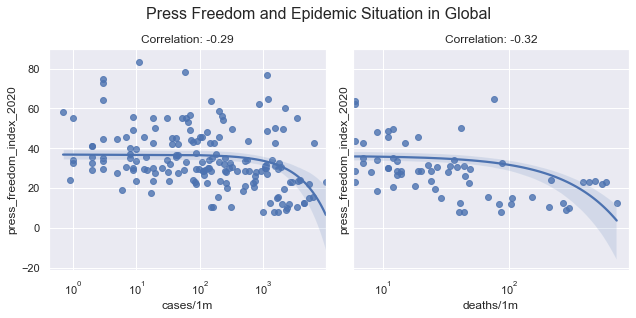

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

p1 = sns.regplot(data=df, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')

p2 = sns.regplot(data=df, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Press Freedom and Epidemic Situation in Global', fontsize=16)
plt.tight_layout()

axs[0].set_title('Correlation: ' + str(round(df_corr.values[0, 3],2)))
axs[1].set_title('Correlation: ' + str(round(df_corr.values[1, 3],2)))

plt.savefig(charts_path + '\\general_corr.jpg', bbox_inches='tight')

# Correlation between Top and Bottom Group Press-Freedom Score

## Top group

In [18]:
top_20_pfi_f = df.sort_values(by='press_freedom_index_2020')[:20]

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


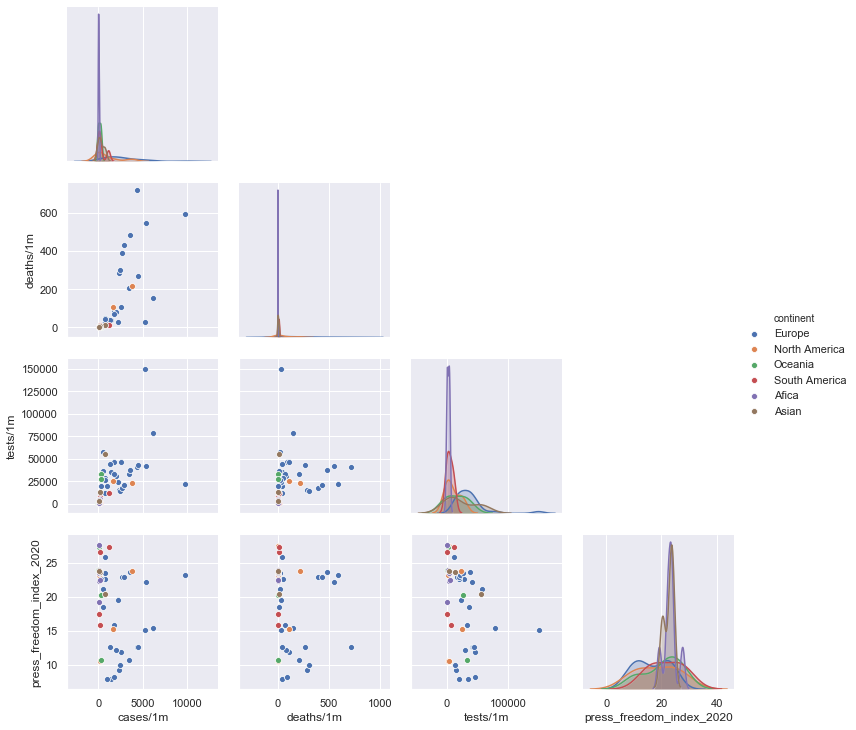

In [168]:
sns.pairplot(top_50_pfi_f, corner=True, hue='continent')

[None]

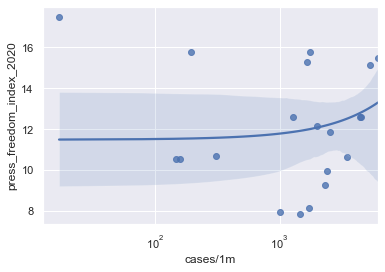

In [19]:
splot = sns.regplot(data=top_20_pfi_f, x='cases/1m', y='press_freedom_index_2020')
splot.set(xscale='log')

In [22]:
pfi_t_20_corr = pd.DataFrame(top_20_pfi_f[['cases/1m', 'deaths/1m']].corrwith(top_20_pfi_f['press_freedom_index_2020']), columns=['top20'])

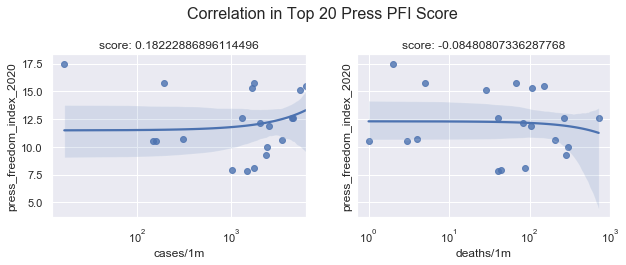

In [31]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)

p1 = sns.regplot(data=top_20_pfi_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')

p2 = sns.regplot(data=top_20_pfi_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Correlation in Top 20 Press PFI Score', fontsize=16)
axs[0].set_title('score: ' + str(pfi_t_20_corr.values[0, 0]))
axs[1].set_title('score: ' + str(pfi_t_20_corr.values[1, 0]))

plt.savefig(charts_path + '\\corr_top20.jpg')

## Bottom group

In [63]:
bottom_20_pfi_f = df.sort_values(by='press_freedom_index_2020', ascending=False)[:20]

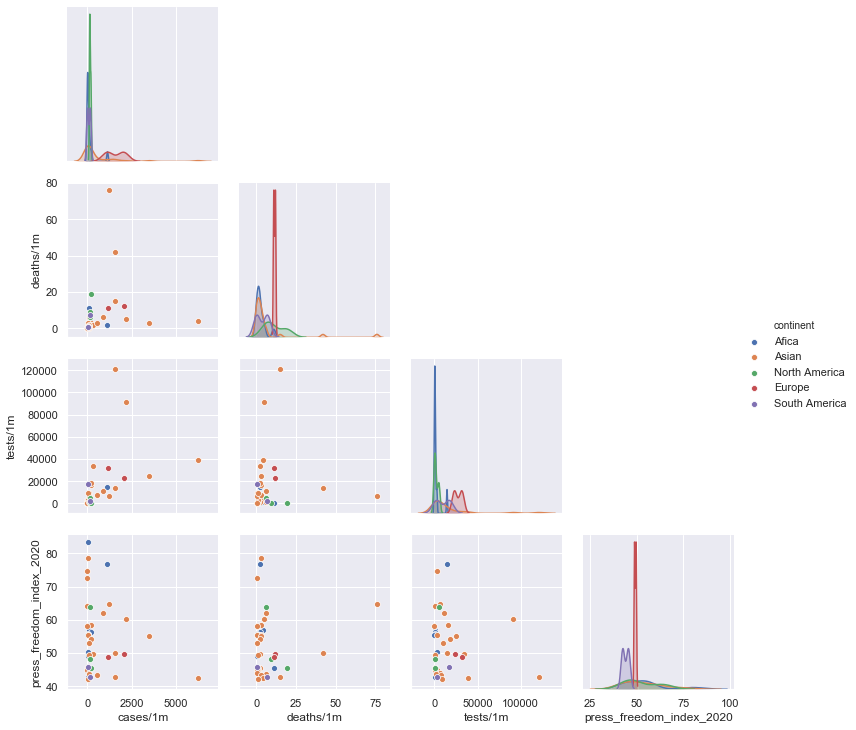

In [171]:
sns.pairplot(bottom_50_pfi_f, corner=True, hue='continent')

In [64]:
pfi_b_20_corr = pd.DataFrame(bottom_20_pfi_f[['cases/1m', 'deaths/1m']].corrwith(bottom_20_pfi_f['press_freedom_index_2020']), columns=['bottom20'])

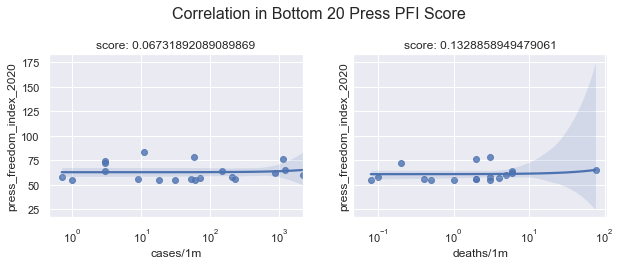

In [30]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)

p1 = sns.regplot(data=bottom_20_pfi_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')

p2 = sns.regplot(data=bottom_20_pfi_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Correlation in Bottom 20 Press PFI Score', fontsize=16)
axs[0].set_title('score: ' + str(pfi_b_20_corr.values[0, 0]))
axs[1].set_title('score: ' + str(pfi_b_20_corr.values[1, 0]))

plt.savefig(charts_path + '\\corr_bottom20.jpg')

# Correlation among types of Press-Freedom Index

### Free

In [33]:
free_f = df[df['pfi_category'] == 'free']

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


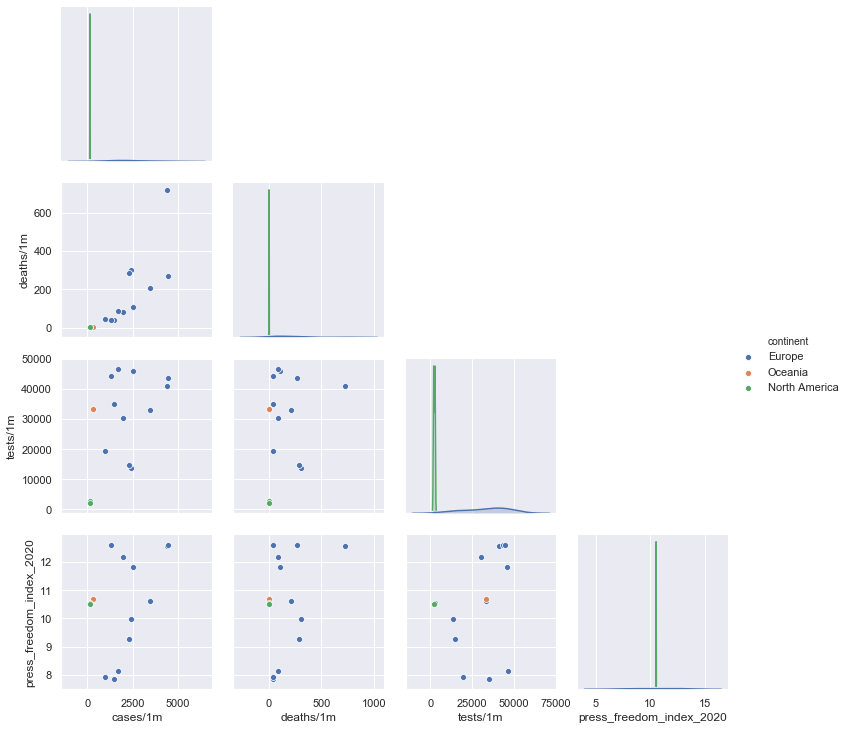

In [187]:
sns.pairplot(free_f, corner=True, hue='continent')

In [34]:
pfi_corr_1 = pd.DataFrame(free_f[['cases/1m', 'deaths/1m']].corrwith(free_f['press_freedom_index_2020']), columns=['free_type'])

In [35]:
pfi_corr_1

,free_type
cases/1m,0.413341
deaths/1m,0.335661


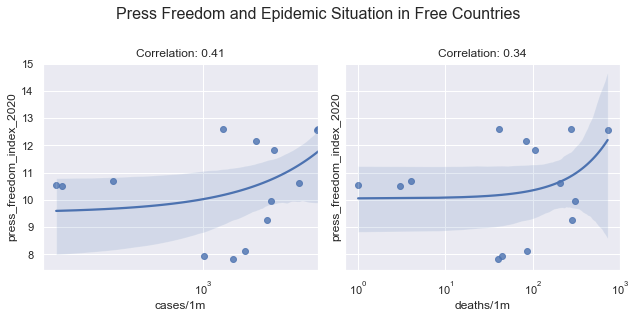

In [41]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

p1 = sns.regplot(data=free_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')

p2 = sns.regplot(data=free_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Press Freedom and Epidemic Situation in Free Countries', fontsize=16)
axs[0].set_title('Correlation: ' + str(round(pfi_corr_1.values[0, 0],2)))
axs[1].set_title('Correlation: ' + str(round(pfi_corr_1.values[1, 0],2)))
plt.tight_layout()
plt.savefig(charts_path + '\\corr_free.jpg', bbox_inches='tight')

### Upper Average

In [41]:
df.loc[(df['press_freedom_index_2020'] >12.61) & (df['press_freedom_index_2020'] <=23.99), 'pfi_type'] = 'upper_average'

In [42]:
press_bin_2_f = df[(df['press_freedom_index_2020'] >12.61) & (df['press_freedom_index_2020'] <=23.99)]

In [43]:
press_bin_2_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type
0,3740.0,218.0,23347.0,23.85,USA,Northern America,North America,upper_average
1,5359.0,548.0,41332.0,22.16,Spain,Southern Europe,Europe,upper_average
2,3523.0,485.0,37158.0,23.69,Italy,Southern Europe,Europe,upper_average
3,2872.0,433.0,20385.0,22.93,UK,Northern Europe,Europe,upper_average
4,2613.0,391.0,16856.0,22.92,France,Western Europe,Europe,upper_average


C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


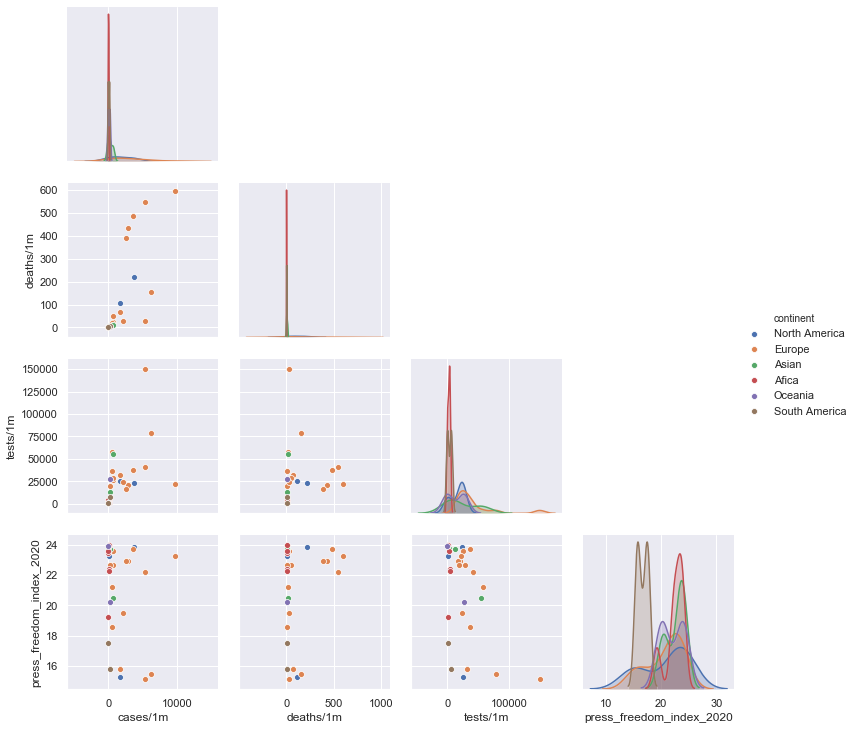

In [193]:
sns.pairplot(press_bin_2_f, corner=True, hue='continent')

In [44]:
pfi_corr_2 = pd.DataFrame(press_bin_2_f[['cases/1m', 'deaths/1m']].corrwith(press_bin_2_f['press_freedom_index_2020']), columns=['upper_avg_type'])

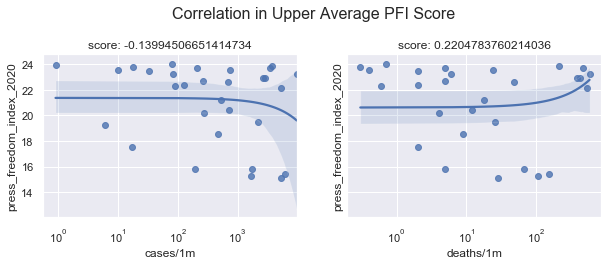

In [326]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)
p1 = sns.regplot(data=press_bin_2_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')
p2 = sns.regplot(data=press_bin_2_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Correlation in Upper Average PFI Score', fontsize=16)
axs[0].set_title('score: ' + str(pfi_corr_2.values[0, 0]))
axs[1].set_title('score: ' + str(pfi_corr_2.values[1, 0]))

plt.savefig(charts_path + '\\corr_upper.jpg')

### Average

In [45]:
df.loc[(df['press_freedom_index_2020'] >23.99) & (df['press_freedom_index_2020'] <=34.35), 'pfi_type'] = 'average'

In [46]:
press_bin_3_f = df[(df['press_freedom_index_2020'] >23.99) & (df['press_freedom_index_2020'] <=34.35)]

In [47]:
press_bin_3_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type
8,546.0,37.0,1597.0,34.05,Brazil,South America,South America,average
12,1553.0,44.0,12331.0,30.94,Peru,South America,South America,average
16,1807.0,89.0,4544.0,32.62,Ecuador,South America,South America,average
23,1152.0,14.0,11618.0,27.31,Chile,South America,South America,average
28,1885.0,27.0,48885.0,30.84,Israel,Western Asian,Asian,average


In [197]:
press_bin_3_f[['cases/1m', 'deaths/1m', 'tests/1m']].corrwith(press_bin_3_f['press_freedom_index_2020'])

cases/1m     0.031247
deaths/1m   -0.078944
tests/1m     0.032803
dtype: float64

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


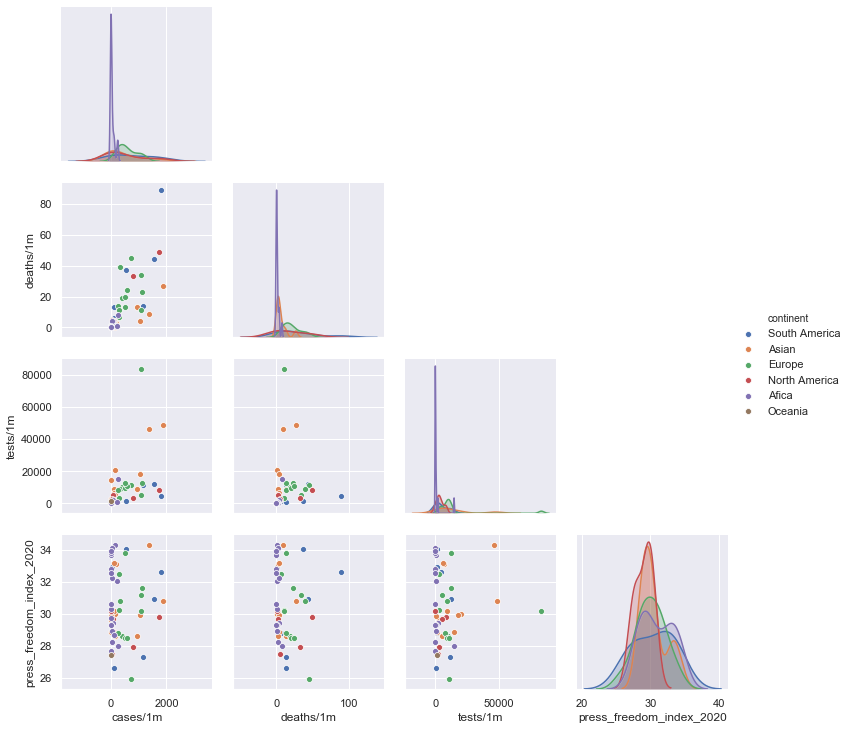

In [198]:
sns.pairplot(press_bin_3_f, corner=True, hue='continent')

In [48]:
pfi_corr_3 = pd.DataFrame(press_bin_3_f[['cases/1m', 'deaths/1m']].corrwith(press_bin_3_f['press_freedom_index_2020']), columns=['avg_type'])

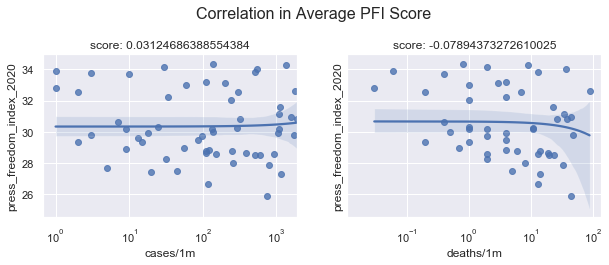

In [334]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)
p1 = sns.regplot(data=press_bin_3_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')
p2 = sns.regplot(data=press_bin_3_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Correlation in Average PFI Score', fontsize=16)
axs[0].set_title('score: ' + str(pfi_corr_3.values[0, 0]))
axs[1].set_title('score: ' + str(pfi_corr_3.values[1, 0]))

plt.savefig(charts_path + '\\corr_avg.jpg')

### Lower Average

In [49]:
df.loc[(df['press_freedom_index_2020'] >34.35) & (df['press_freedom_index_2020'] <=54.11), 'pfi_type'] = 'lower_average'

In [50]:
press_bin_4_f = df[(df['press_freedom_index_2020'] >34.35) & (df['press_freedom_index_2020'] <=54.11)]

In [51]:
press_bin_4_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type
6,1137.0,11.0,31752.0,48.92,Russia,Eastern Europe,Europe,lower_average
7,1535.0,42.0,14281.0,50.02,Turkey,Western Asian,Asian,lower_average
14,36.0,1.0,925.0,45.33,India,Southern Asia,Asian,lower_average
19,202.0,19.0,776.0,45.45,Mexico,Central America,North America,lower_average
22,102.0,2.0,1053.0,45.52,Pakistan,Southern Asia,Asian,lower_average


In [202]:
press_bin_4_f[['cases/1m', 'deaths/1m', 'tests/1m']].corrwith(press_bin_4_f['press_freedom_index_2020'])

cases/1m     0.131317
deaths/1m    0.247255
tests/1m     0.175562
dtype: float64

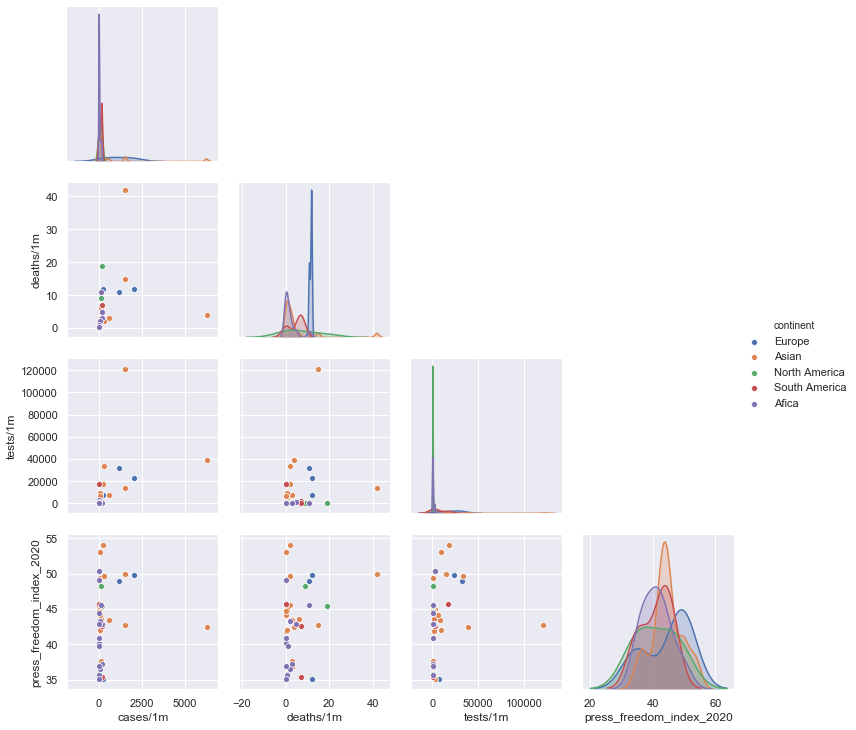

In [203]:
sns.pairplot(press_bin_4_f, corner=True, hue='continent')

In [52]:
pfi_corr_4 = pd.DataFrame(press_bin_4_f[['cases/1m', 'deaths/1m']].corrwith(press_bin_4_f['press_freedom_index_2020']), columns=['lower_avg_type'])

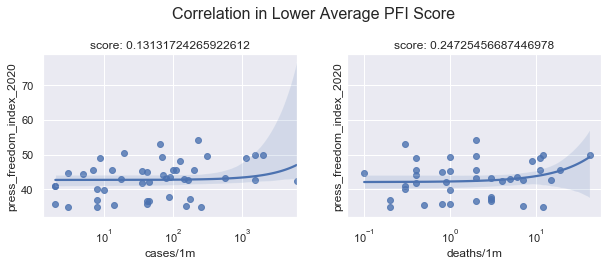

In [333]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 3), sharey=True)
p1 = sns.regplot(data=press_bin_4_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')
p2 = sns.regplot(data=press_bin_4_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Correlation in Lower Average PFI Score', fontsize=16)
axs[0].set_title('score: ' + str(pfi_corr_4.values[0, 0]))
axs[1].set_title('score: ' + str(pfi_corr_4.values[1, 0]))

plt.savefig(charts_path + '\\corr_lower.jpg')

### Not Free

In [43]:
not_free_f = df[df['pfi_category'] == 'not_free']

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


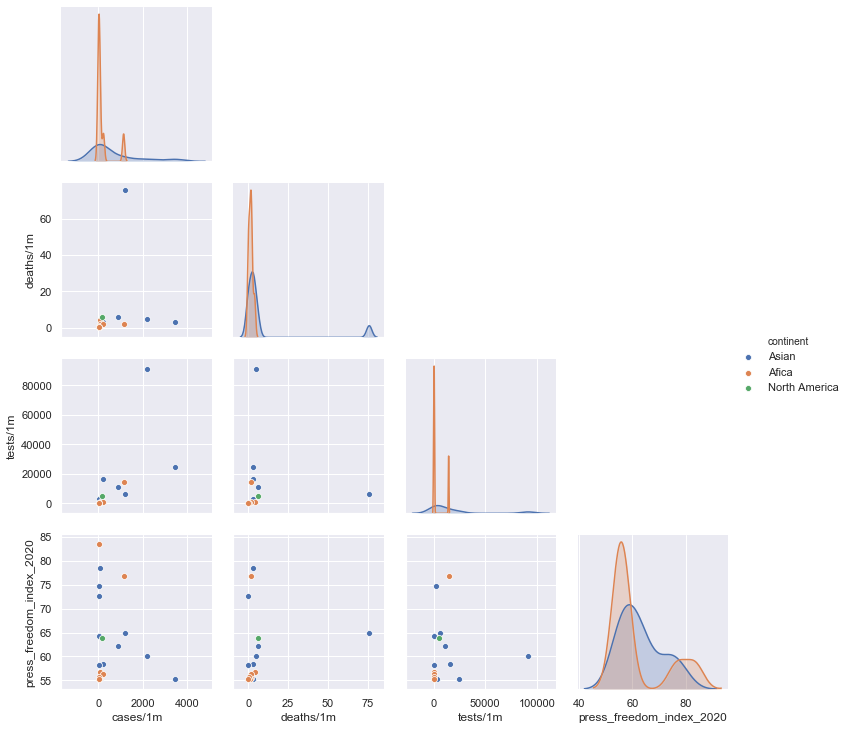

In [208]:
sns.pairplot(not_free_f, corner=True, hue='continent')

In [45]:
pfi_corr_5 = pd.DataFrame(not_free_f[['cases/1m', 'deaths/1m']].corrwith(not_free_f['press_freedom_index_2020']), columns=['not_free_type'])

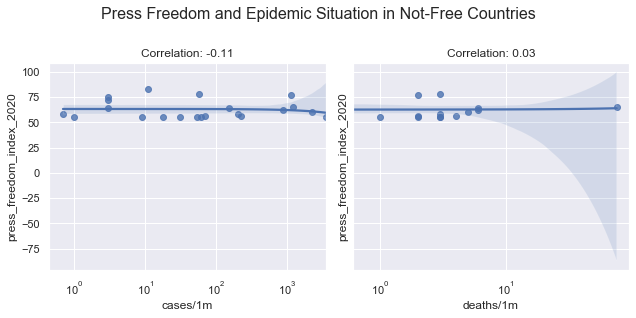

In [48]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(9, 4), sharey=True)

p1 = sns.regplot(data=not_free_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')

p2 = sns.regplot(data=not_free_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')

fig.suptitle(y=1.1, t='Press Freedom and Epidemic Situation in Not-Free Countries', fontsize=16)
axs[0].set_title('Correlation: ' + str(round(pfi_corr_5.values[0, 0],2)))
axs[1].set_title('Correlation: ' + str(round(pfi_corr_5.values[1, 0],2)))
plt.tight_layout()

plt.savefig(charts_path + '\\corr_not_free.jpg', bbox_inches='tight')

In [57]:
pfi_corr = pd.merge(pfi_corr_1, pfi_corr_2, left_index=True, right_index=True)

In [58]:
pfi_corr = pd.merge(pfi_corr, pfi_corr_3, left_index=True, right_index=True)

In [59]:
pfi_corr = pd.merge(pfi_corr, pfi_corr_4, left_index=True, right_index=True)

In [60]:
pfi_corr = pd.merge(pfi_corr, pfi_corr_5, left_index=True, right_index=True)

In [66]:
pfi_corr = pd.merge(pfi_corr, pfi_b_20_corr, left_index=True, right_index=True)

In [68]:
pfi_corr = pd.merge(pfi_corr, pfi_t_20_corr, left_index=True, right_index=True)

In [69]:
pfi_corr

,free_type,upper_avg_type,avg_type,lower_avg_type,not_free_type,bottom20,top20
cases/1m,0.413341,-0.139945,0.031247,0.131317,-0.106378,0.067319,0.182229
deaths/1m,0.335661,0.220478,-0.078944,0.247255,0.139767,0.132886,-0.084808


# Correlation by Continent

## Europe

In [70]:
eu_f = df[df['continent'] == 'Europe']

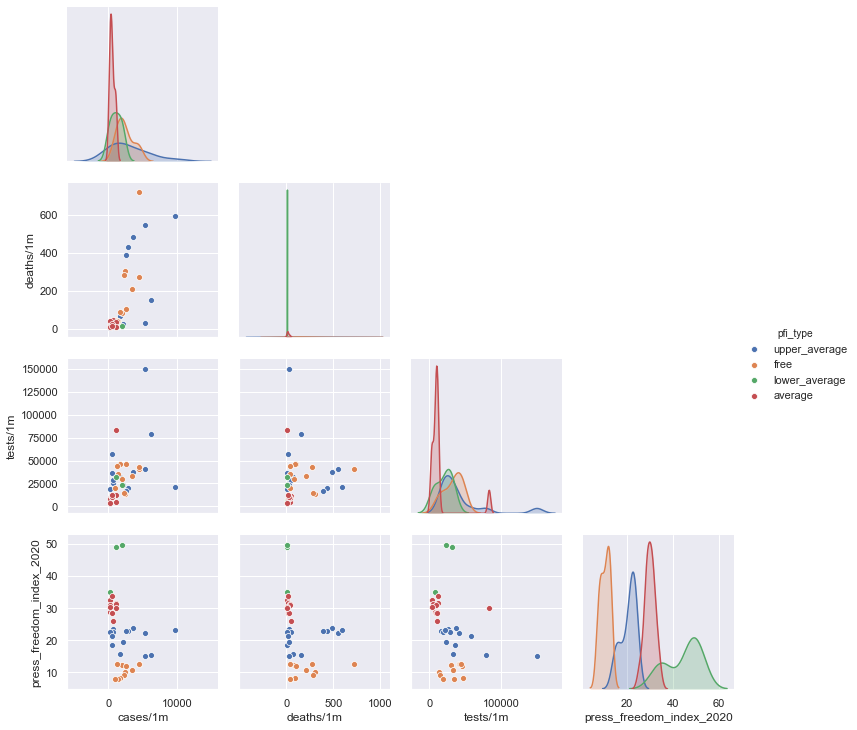

In [210]:
sns.pairplot(eu_f, corner=True, hue='pfi_type')

In [156]:
eu_corr = pd.DataFrame(eu_f[['cases/1m', 'deaths/1m']].corrwith(eu_f['press_freedom_index_2020']), columns=['europe'])

,europe
log_cases/1m,-0.437900
log_deaths/1m,-0.531301


In [77]:
eu_corr

,europe
cases/1m,-0.316628
deaths/1m,-0.297826


In [81]:
eu_f['log_cases/1m'] = np.log(eu_f['cases/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [83]:
eu_f['log_deaths/1m'] = np.log(eu_f['deaths/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [84]:
eu_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type,log_cases/1m,log_deaths/1m
1,5359.0,548.0,41332.0,22.16,Spain,Southern Europe,Europe,upper_average,8.586533,6.306275
2,3523.0,485.0,37158.0,23.69,Italy,Southern Europe,Europe,upper_average,8.167068,6.184149
3,2872.0,433.0,20385.0,22.93,UK,Northern Europe,Europe,upper_average,7.962764,6.070738
4,2613.0,391.0,16856.0,22.92,France,Western Europe,Europe,upper_average,7.868254,5.968708
5,1993.0,83.0,30400.0,12.16,Germany,Western Europe,Europe,free,7.597396,4.418841


In [161]:
eu_corr = eu_f[['log_cases/1m', 'log_deaths/1m', 'press_freedom_index_2020']].groupby(eu_f['pfi_type']).corr()

In [171]:
eu_corr.drop(columns=['log_cases/1m', 'log_deaths/1m'], inplace=True)

In [175]:
eu_corr.drop(index=[('average', 'press_freedom_index_2020'),
                    ('free', 'press_freedom_index_2020'),
                    ('lower_average', 'press_freedom_index_2020'),
                    ('upper_average', 'press_freedom_index_2020')], inplace=True)

In [179]:
eu_corr

press_freedom_index_2020
pfi_type                                             
average       log_cases/1m                  -0.006669
              log_deaths/1m                 -0.464942
free          log_cases/1m                   0.569771
              log_deaths/1m                  0.374645
lower_average log_cases/1m                   0.974971
              log_deaths/1m                 -0.455815
upper_average log_cases/1m                  -0.187405
              log_deaths/1m                  0.277076

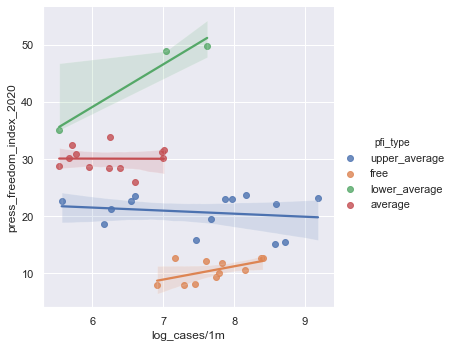

In [215]:
ax = sns.lmplot(data=eu_f, x='log_cases/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_eu_deaths.jpg')

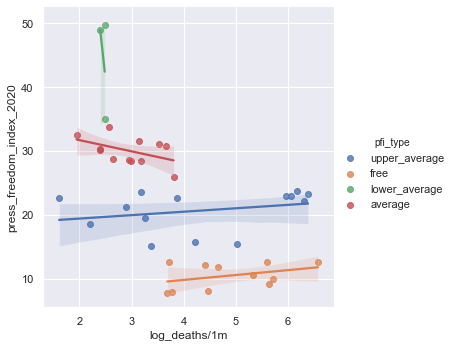

In [214]:
sns.lmplot(data=eu_f, x='log_deaths/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_eu_deaths.jpg')

[None]

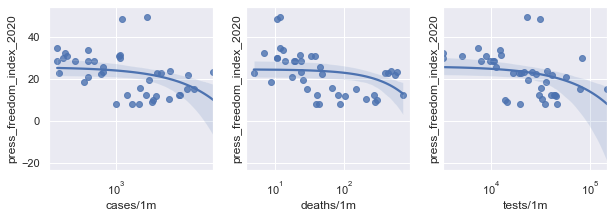

In [273]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)
p1 = sns.regplot(data=eu_f, x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')
p2 = sns.regplot(data=eu_f, x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')
p3 = sns.regplot(data=eu_f, x='tests/1m', y='press_freedom_index_2020', ax=axs[2])
p3.set(xscale='log')

## Asian

In [87]:
as_f = df[df['continent'] == 'Asian']

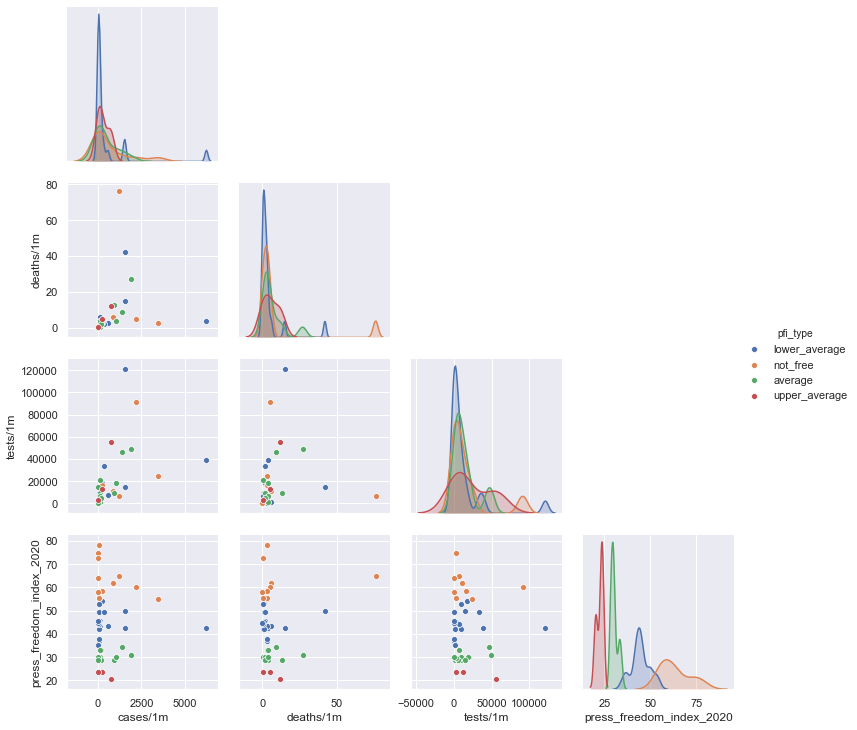

In [212]:
sns.pairplot(as_f, corner=True, hue='pfi_type')

In [88]:
as_corr = pd.DataFrame(as_f[['cases/1m', 'deaths/1m']].corrwith(as_f['press_freedom_index_2020']), columns=['asian'])

In [89]:
as_corr

,asian
cases/1m,0.027130
deaths/1m,0.122922


In [90]:
as_f['log_cases/1m'] = np.log(as_f['cases/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [91]:
as_f['log_deaths/1m'] = np.log(as_f['deaths/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [92]:
as_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type,log_cases/1m,log_deaths/1m
7,1535.0,42.0,14281.0,50.02,Turkey,Western Asian,Asian,lower_average,7.336286,3.737670
9,1210.0,76.0,6325.0,64.81,Iran,Southern Asia,Asian,not_free,7.098376,4.330733
10,58.0,3.0,NaN,78.48,China,Eastern Asia,Asian,not_free,4.060443,1.098612
14,36.0,1.0,925.0,45.33,India,Southern Asia,Asian,lower_average,3.583519,0.000000
17,869.0,6.0,10818.0,62.14,Saudi Arabia,Western Asian,Asian,not_free,6.767343,1.791759


In [180]:
as_corr = as_f[['log_cases/1m', 'log_deaths/1m', 'press_freedom_index_2020']].groupby(as_f['pfi_type']).corr()

In [183]:
as_corr.drop(columns=['log_cases/1m', 'log_deaths/1m'], inplace=True)

In [186]:
as_corr.drop(index=[('average', 'press_freedom_index_2020'),
                    ('not_free', 'press_freedom_index_2020'),
                    ('lower_average', 'press_freedom_index_2020'),
                    ('upper_average', 'press_freedom_index_2020')], inplace=True)

In [187]:
as_corr

press_freedom_index_2020
pfi_type                                             
average       log_cases/1m                   0.323498
              log_deaths/1m                  0.157696
lower_average log_cases/1m                   0.266153
              log_deaths/1m                 -0.074118
not_free      log_cases/1m                  -0.335500
              log_deaths/1m                  0.034192
upper_average log_cases/1m                  -0.767019
              log_deaths/1m                 -0.695092

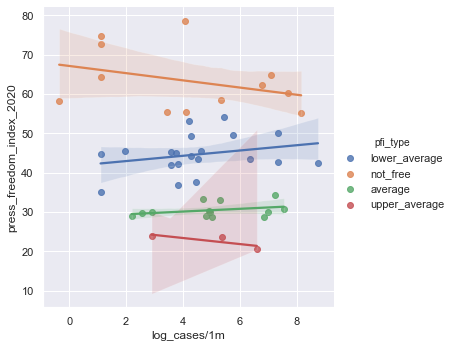

In [213]:
sns.lmplot(data=as_f, x='log_cases/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_as_cases.jpg')

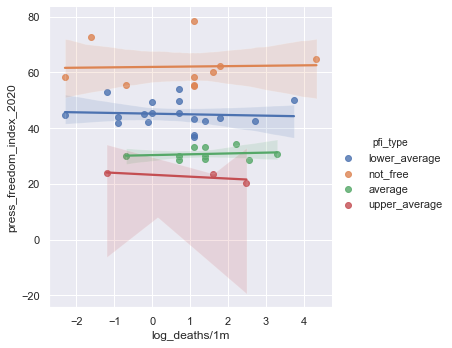

In [212]:
sns.lmplot(data=as_f, x='log_deaths/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_as_deaths.jpg')

[None]

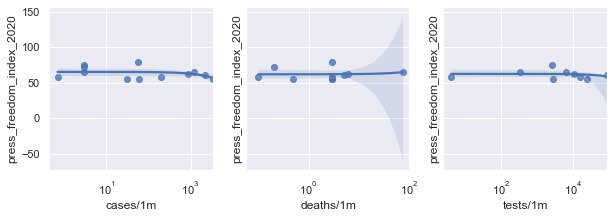

In [276]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(10, 3), sharey=True)
p1 = sns.regplot(data=as_f[as_f['pfi_type']=='not_free'], x='cases/1m', y='press_freedom_index_2020', ax=axs[0])
p1.set(xscale='log')
p2 = sns.regplot(data=as_f[as_f['pfi_type']=='not_free'], x='deaths/1m', y='press_freedom_index_2020', ax=axs[1])
p2.set(xscale='log')
p3 = sns.regplot(data=as_f[as_f['pfi_type']=='not_free'], x='tests/1m', y='press_freedom_index_2020', ax=axs[2])
p3.set(xscale='log')

## Africa

In [95]:
af_f = df[df['continent'] == 'Africa']

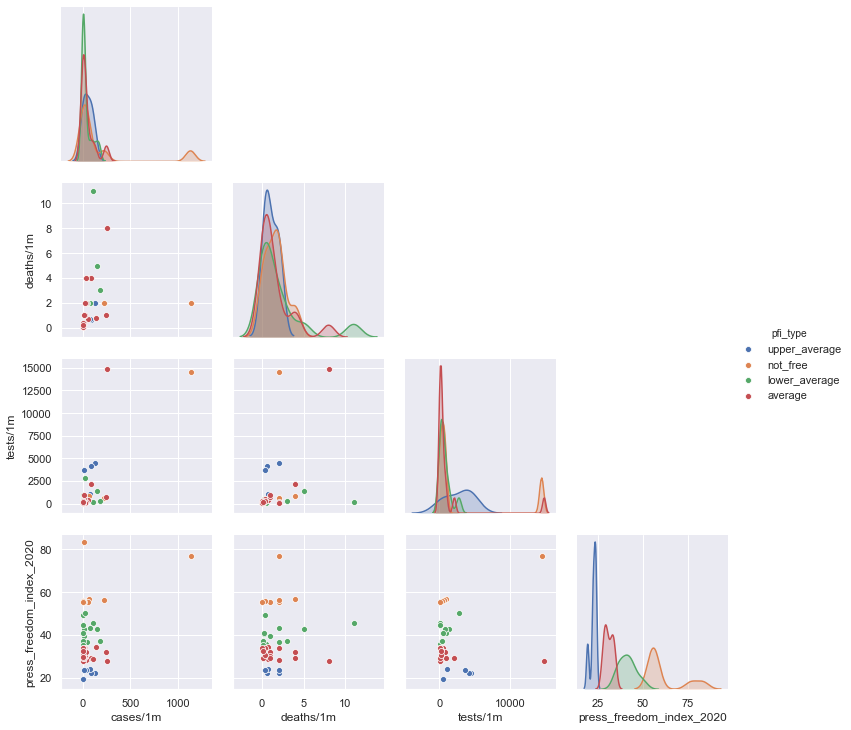

In [239]:
sns.pairplot(af_f, corner=True, hue='pfi_type')

In [96]:
af_corr = pd.DataFrame(af_f[['cases/1m', 'deaths/1m']].corrwith(af_f['press_freedom_index_2020']), columns=['africa'])

In [97]:
af_corr

,africa
cases/1m,0.365441
deaths/1m,0.091800


In [98]:
af_f['log_cases/1m'] = np.log(af_f['cases/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [100]:
af_f['log_deaths/1m'] = np.log(af_f['deaths/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [101]:
af_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type,log_cases/1m,log_deaths/1m
45,128.0,2.0,4520.0,22.41,South Africa,Southern Africa,Africa,upper_average,4.852030,0.693147
47,70.0,4.0,879.0,56.82,Egypt,Northern Africa,Africa,not_free,4.248495,1.386294
52,146.0,5.0,1412.0,42.88,Morocco,Northern Africa,Africa,lower_average,4.983607,1.609438
54,110.0,11.0,148.0,45.52,Algeria,Northern Africa,Africa,lower_average,4.700480,2.397895
62,14.0,0.5,95.0,35.63,Nigeria,Western Africa,Africa,lower_average,2.639057,-0.693147


In [188]:
af_corr = af_f[['log_cases/1m', 'log_deaths/1m', 'press_freedom_index_2020']].groupby(af_f['pfi_type']).corr()

In [190]:
af_corr.drop(columns=['log_cases/1m', 'log_deaths/1m'], inplace=True)

In [191]:
af_corr.drop(index=[('average', 'press_freedom_index_2020'),
                    ('not_free', 'press_freedom_index_2020'),
                    ('lower_average', 'press_freedom_index_2020'),
                    ('upper_average', 'press_freedom_index_2020')], inplace=True)

In [192]:
af_corr

press_freedom_index_2020
pfi_type                                             
average       log_cases/1m                  -0.252289
              log_deaths/1m                 -0.427631
lower_average log_cases/1m                   0.053252
              log_deaths/1m                  0.327274
not_free      log_cases/1m                   0.268842
              log_deaths/1m                  0.273149
upper_average log_cases/1m                   0.481752
              log_deaths/1m                 -0.231150

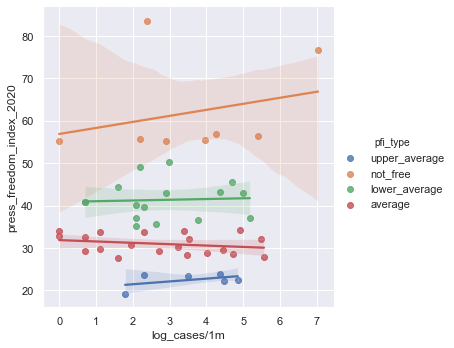

In [210]:
sns.lmplot(data=af_f, x='log_cases/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_af_cases.jpg')

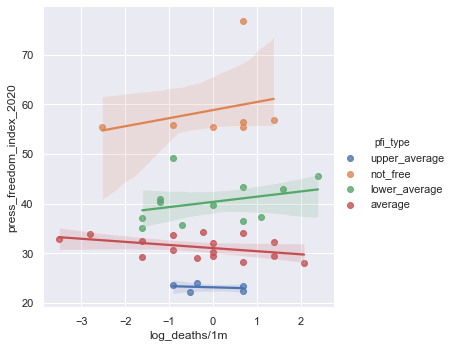

In [211]:
sns.lmplot(data=af_f, x='log_deaths/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_af_deaths.jpg')

## North America

In [104]:
na_f = df[df['continent'] == 'North America']

In [117]:
na_f.drop(index=78, inplace=True)

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


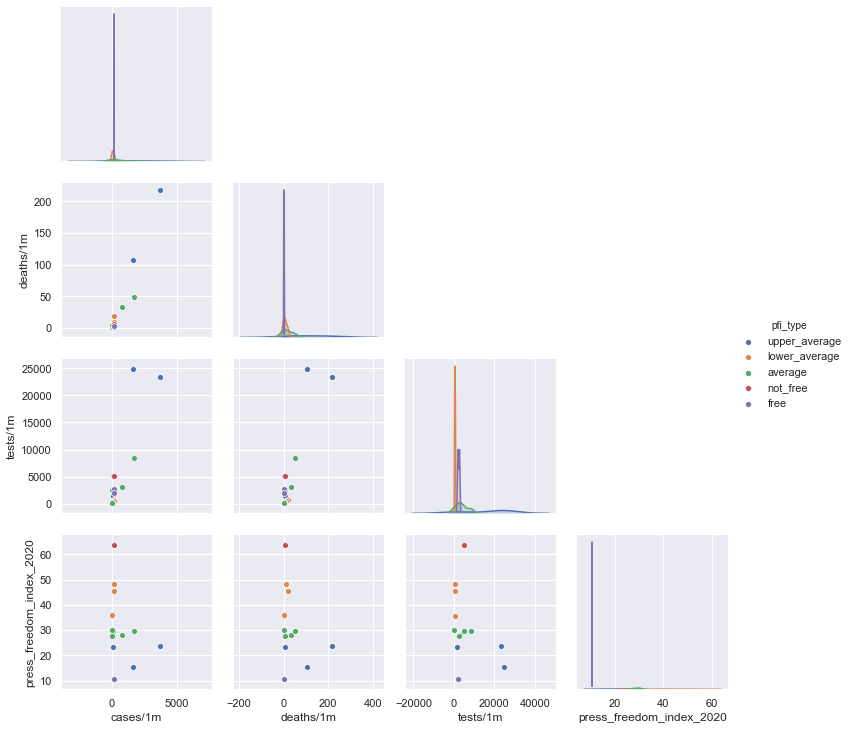

In [241]:
sns.pairplot(na_f, corner=True, hue='pfi_type')

In [118]:
na_corr = pd.DataFrame(na_f[['cases/1m', 'deaths/1m']].corrwith(na_f['press_freedom_index_2020']), columns=['na'])

In [119]:
na_corr

,na
cases/1m,-0.213864
deaths/1m,-0.201781


In [120]:
na_f['log_cases/1m'] = np.log(na_f['cases/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [121]:
na_f['log_deaths/1m'] = np.log(na_f['deaths/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [122]:
na_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type,log_cases/1m,log_deaths/1m
0,3740.0,218.0,23347.0,23.85,USA,Northern America,North America,upper_average,8.226841,5.384495
11,1644.0,107.0,24921.0,15.29,Canada,Northern America,North America,upper_average,7.404888,4.672829
19,202.0,19.0,776.0,45.45,Mexico,Central America,North America,lower_average,5.308268,2.944439
42,782.0,33.0,3077.0,27.90,Dominican Republic,Caribbean,North America,average,6.661855,3.496508
46,1744.0,49.0,8455.0,29.78,Panama,Central America,North America,average,7.463937,3.891820


In [193]:
na_corr = na_f[['log_cases/1m', 'log_deaths/1m', 'press_freedom_index_2020']].groupby(na_f['pfi_type']).corr()

In [195]:
na_corr.drop(columns=['log_cases/1m', 'log_deaths/1m'], inplace=True)

In [197]:
na_corr.drop(index=[('average', 'press_freedom_index_2020'),
                    ('free', 'press_freedom_index_2020'),
                    ('lower_average', 'press_freedom_index_2020'),
                    ('upper_average', 'press_freedom_index_2020')], inplace=True)

In [198]:
na_corr

press_freedom_index_2020
pfi_type                                             
average       log_cases/1m                  -0.168669
              log_deaths/1m                 -0.346149
free          log_cases/1m                  -1.000000
              log_deaths/1m                 -1.000000
lower_average log_cases/1m                   0.762597
              log_deaths/1m                  0.930992
upper_average log_cases/1m                  -0.248339
              log_deaths/1m                 -0.266124

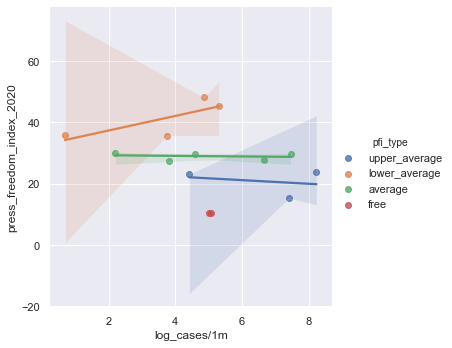

In [208]:
sns.lmplot(data=na_f, x='log_cases/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_na_cases.jpg')

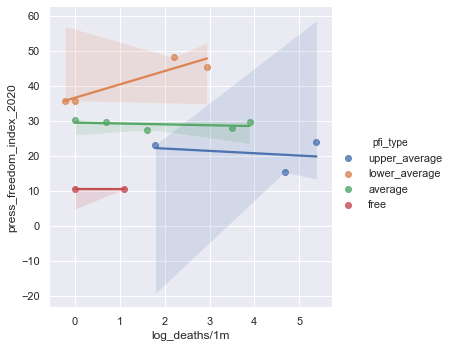

In [209]:
sns.lmplot(data=na_f, x='log_deaths/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_na_deaths.jpg')

## South America

In [126]:
sa_f = df[df['continent'] == 'South America']

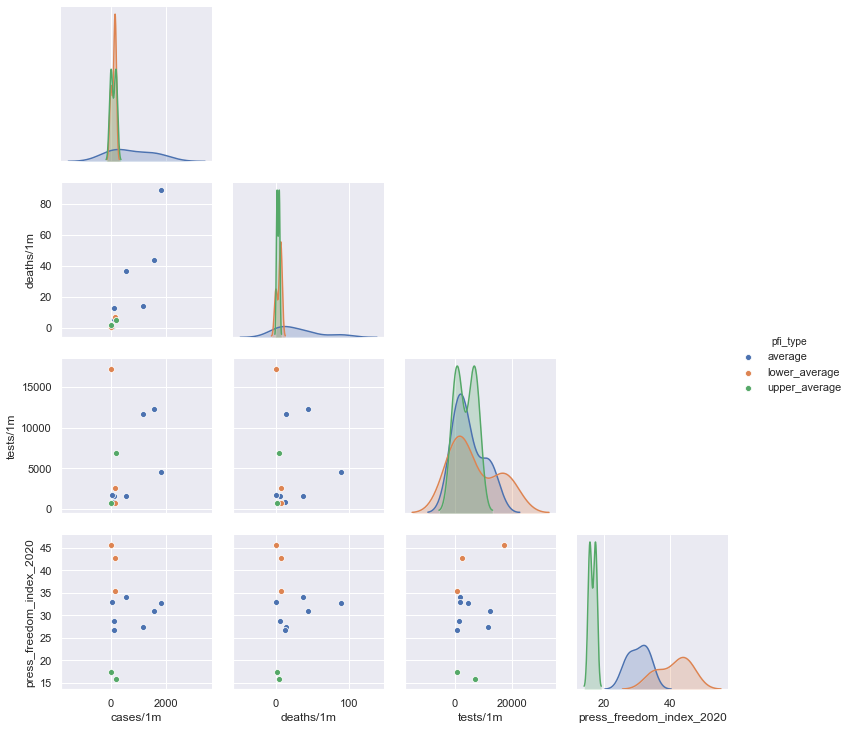

In [243]:
sns.pairplot(sa_f, corner=True, hue='pfi_type')

In [128]:
sa_corr = pd.DataFrame(sa_f[['cases/1m', 'deaths/1m']].corrwith(sa_f['press_freedom_index_2020']), columns=['sa'])

In [130]:
sa_corr

,sa
cases/1m,0.001924
deaths/1m,0.072508


In [131]:
sa_f['log_cases/1m'] = np.log(sa_f['cases/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [132]:
sa_f['log_deaths/1m'] = np.log(sa_f['deaths/1m'])

C:\Users\DucTRung\Anaconda3\envs\cc_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [133]:
sa_f.head()

,cases/1m,deaths/1m,tests/1m,press_freedom_index_2020,country,region,continent,pfi_type,log_cases/1m,log_deaths/1m
8,546.0,37.0,1597.0,34.05,Brazil,South America,South America,average,6.302619,3.610918
12,1553.0,44.0,12331.0,30.94,Peru,South America,South America,average,7.347944,3.784190
16,1807.0,89.0,4544.0,32.62,Ecuador,South America,South America,average,7.499423,4.488636
23,1152.0,14.0,11618.0,27.31,Chile,South America,South America,average,7.049255,2.639057
41,169.0,7.0,2498.0,42.66,Colombia,South America,South America,lower_average,5.129899,1.945910


In [199]:
sa_corr = sa_f[['log_cases/1m', 'log_deaths/1m', 'press_freedom_index_2020']].groupby(sa_f['pfi_type']).corr()

In [202]:
sa_corr.drop(columns=['log_cases/1m', 'log_deaths/1m'], inplace=True)

In [204]:
sa_corr.drop(index=[('average', 'press_freedom_index_2020'),
                    ('lower_average', 'press_freedom_index_2020'),
                    ('upper_average', 'press_freedom_index_2020')], inplace=True)

In [205]:
sa_corr

press_freedom_index_2020
pfi_type                                             
average       log_cases/1m                   0.150994
              log_deaths/1m                  0.118741
lower_average log_cases/1m                  -0.702595
              log_deaths/1m                 -0.724968
upper_average log_cases/1m                  -1.000000
              log_deaths/1m                 -1.000000

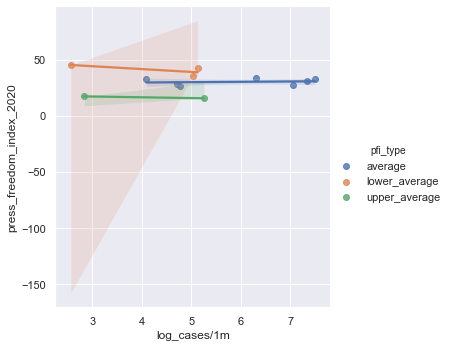

In [207]:
sns.lmplot(data=sa_f, x='log_cases/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_sa_cases.jpg')

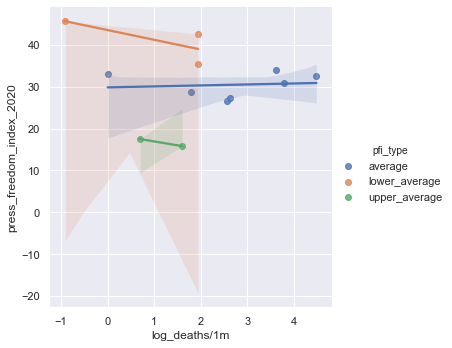

In [206]:
sns.lmplot(data=sa_f, x='log_deaths/1m', y='press_freedom_index_2020', hue='pfi_type')
plt.savefig(charts_path + '\\corr_sa_deaths.jpg')

In [143]:
pfi_corr = pd.merge(pfi_corr, eu_corr, left_index=True, right_index=True)

In [145]:

pfi_corr = pd.merge(pfi_corr, as_corr, left_index=True, right_index=True)

In [148]:
pfi_corr = pd.merge(pfi_corr, af_corr, left_index=True, right_index=True)

In [150]:
pfi_corr = pd.merge(pfi_corr, na_corr, left_index=True, right_index=True)

In [151]:
pfi_corr = pd.merge(pfi_corr, sa_corr, left_index=True, right_index=True)

In [155]:
pfi_corr[['europe', 'asian', 'africa', 'na','sa']]

,europe,asian,africa,na,sa
cases/1m,-0.316628,0.027130,0.365441,-0.213864,0.001924
deaths/1m,-0.297826,0.122922,0.091800,-0.201781,0.072508
